# Tarea - Ajuste de curvas

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [31]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [32]:
def fun(beta,x,data,n):
    f=np.dot(beta,[x**i for i in range (n+1)])
    return np.sum((data-f)**2)

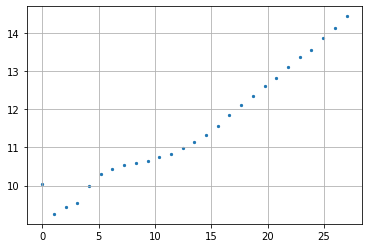

In [33]:
x=np.linspace(0,27,27)
y=data
plt.scatter(x,y,s=5)
plt.grid()

In [36]:
beta0=np.random.rand(2)
sol1=opt.minimize(fun,beta0,args=(x,y,1))
sol1

      fun: 2.3704889518154544
 hess_inv: array([[ 0.07010582, -0.00382128],
       [-0.00382128,  0.00028306]])
      jac: array([-2.98023224e-08,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([9.11567634, 0.17975683])

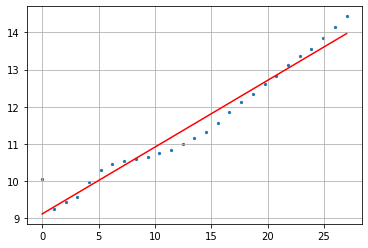

In [37]:
f=np.dot(sol1.x,[x**i for i in range (2)])
plt.plot(x,f,'r')
plt.scatter(x,y,s=5)
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [17]:
data = pd.read_csv('population_data.csv')

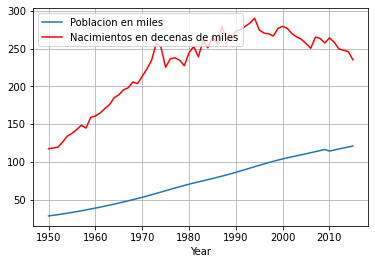

In [18]:

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

In [19]:
data.head()

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752


In [20]:
x=data.values[:,0]-1950
y=data.values[:,1]/1000

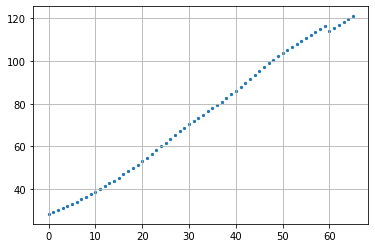

In [21]:
plt.scatter(x,y,s=5)
plt.grid()

In [22]:
y=data.values[:,2]/10000

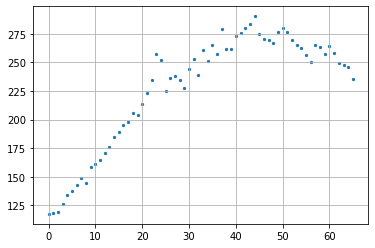

In [23]:
plt.scatter(x,y,s=5)
plt.grid()